In [71]:
"""
examples of the whole pipeline with several images

"""
import logging

%load_ext autoreload
%autoreload 2

logger = logging.getLogger()
logger.setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
"""
Read in + display images + masks

"""

import os
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=3)

# Which indices mark the end of a stack from the same sample
endpoints = [107, 215, 315, 515]

n_imgs = 4
indices = np.concatenate(
    [
        rng.integers(start, end, size=n_imgs)
        for start, end in zip([0, *endpoints[:3]], endpoints)
    ]
)

mask_paths = [f"data/masks cut/{index:04}.tif" for index in indices]
image_paths = [f"data/original cut/{index:04}.tif" for index in indices]

for mask, image in zip(mask_paths, image_paths):
    assert os.path.exists(mask)
    assert os.path.exists(image)

masks = [plt.imread(mask) for mask in mask_paths]
images = [plt.imread(image) for image in image_paths]

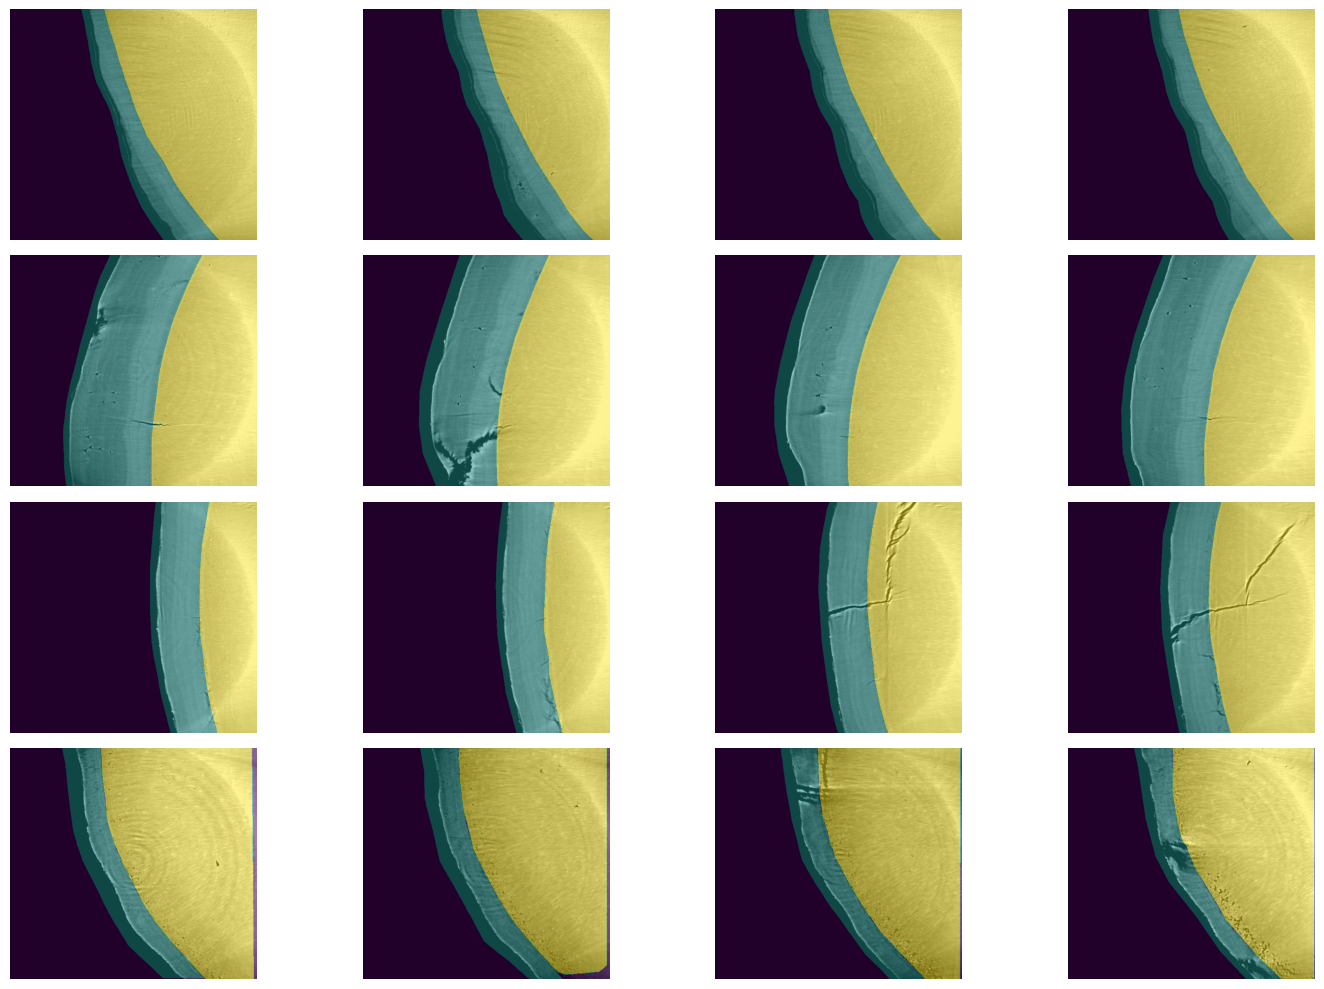

In [77]:
fig, axes = plt.subplots(n_imgs, 4, figsize=(15, 10))

for axis, image, mask in zip(axes.flat, images, masks):
    axis.imshow(image, cmap="gray")
    axis.imshow(mask, cmap="viridis", alpha=0.5)
    axis.set_axis_off()

fig.tight_layout()

In [76]:
"""
Correct any of these masks

"""

from cementum import correct_mask

for mask in masks:
    mask = correct_mask.correct_mask(mask, verbose=True)

INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
CRITICAL:root:Mask is still invalid after correction: All regions in the mask should be contiguous


NotContiguousError: All regions in the mask should be contiguous

In [3]:
"""
Straighten

"""

'\nStraighten\n\n'

In [4]:
"""
Isolate cementum

"""

'\nIsolate cementum\n\n'

In [5]:
"""
Contrast adjustment

"""

'\nContrast adjustment\n\n'

In [ ]:
"""
Ridge detection

"""